In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,ConfusionMatrixDisplay

# Load the data


In [412]:
df = pd.read_csv("recruitment_data 2.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB
None


# Prepare data for modeling



In [413]:
x = df.drop(columns=["HiringDecision"])
y= df["HiringDecision"]

print(y.head())

0    1
1    1
2    0
3    0
4    0
Name: HiringDecision, dtype: int64


# Split the data into training and testing sets


In [415]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)
print(y_train.value_counts())
print(y_test.value_counts())
x_train

HiringDecision
0    714
1    336
Name: count, dtype: int64
HiringDecision
0    321
1    129
Name: count, dtype: int64


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
891,49,1,2,6,1,23.075196,83,53,62,3
1385,31,0,1,0,3,3.684854,21,35,59,2
1186,48,1,2,3,1,37.152856,92,94,46,2
489,41,0,3,8,5,50.195318,76,49,30,1
1236,36,1,2,12,5,26.158958,20,87,19,2
...,...,...,...,...,...,...,...,...,...,...
1041,23,0,2,1,3,14.708202,29,86,37,2
1122,32,0,2,15,4,25.677183,24,95,47,2
1346,49,1,2,10,3,34.240900,91,19,32,2
1406,47,0,2,14,4,23.018711,43,21,58,1


In [416]:
y_train.value_counts()

HiringDecision
0    714
1    336
Name: count, dtype: int64

# Create instance from LogisticRegression


In [417]:
lr_model=LogisticRegression()


# Import Grid Search¶



In [418]:
from sklearn.model_selection import GridSearchCV


In [419]:
param_grid = [    
    {
    'penalty': ['l1'],
    'C' : [  0.1],
    'solver': [ 'liblinear'],
    'max_iter': [ 100]  # Increasing the number of iterations
    }
]

clf = GridSearchCV(lr_model, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1)
best_clf = clf.fit(x_train,y_train)
best_model = best_clf.best_estimator_



In [420]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [421]:
print(f"Accuracy: {accuracy*100}")


Accuracy: 87.55555555555556


In [422]:
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
print("AUC Score:",roc_auc_score(y_test, y_pred))

Recall:  0.7751937984496124
Precision:  0.7874015748031497
F1-Score:  0.78125
AUC Score: 0.8455408244584511


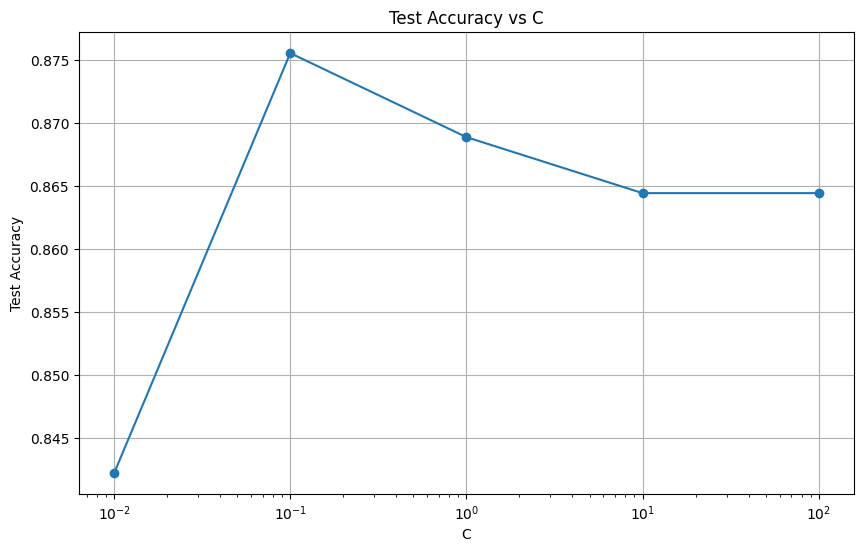

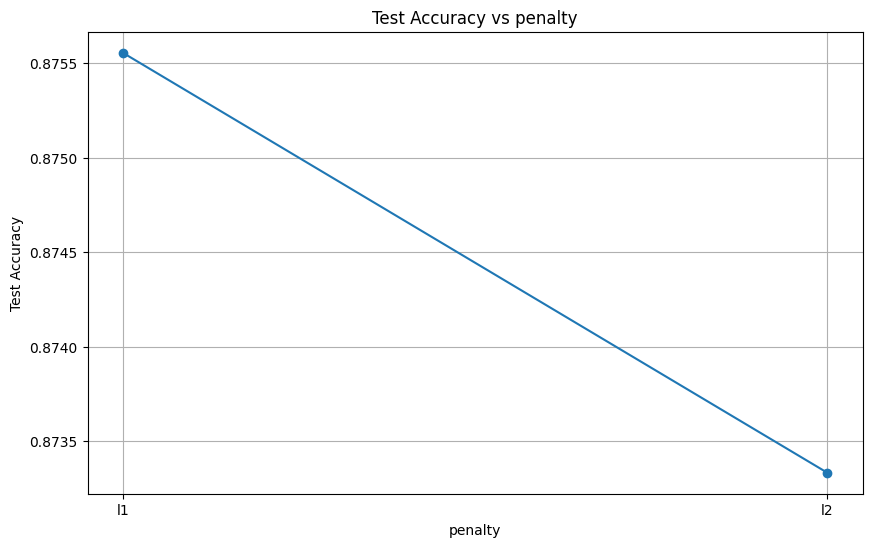

Skipping solver=newton-cg due to error: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Skipping solver=lbfgs due to error: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Skipping solver=sag due to error: Solver sag supports only 'l2' or None penalties, got l1 penalty.


/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


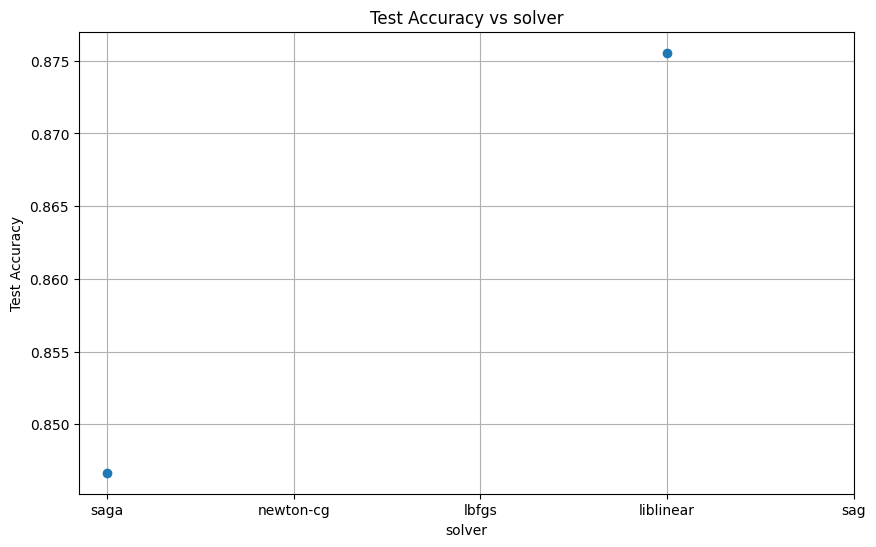

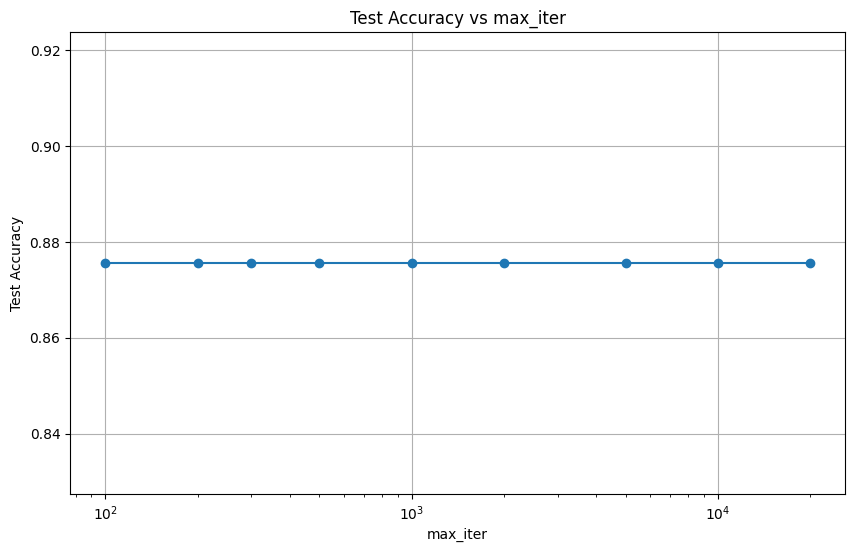

In [424]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the function to plot parameter vs accuracy
def plot_param_vs_accuracy(param, fixed_params, x_train, y_train, x_test, y_test, param_dist):
    param_values = param_dist[param]
    scores = []
    
    for value in param_values:
        params = fixed_params.copy()
        params[param] = value
        try:
            log_reg = LogisticRegression(**params)
            log_reg.fit(x_train, y_train)
            y_pred = log_reg.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
            scores.append(accuracy)
        except ValueError as e:
            print(f"Skipping {param}={value} due to error: {e}")
            scores.append(None)  # Append None or any placeholder for failed runs
    
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, scores, marker='o')
    if param not in ['penalty', 'solver', 'class_weight']:
        plt.xscale('log')
    plt.xlabel(param)
    if param in ['penalty', 'solver', 'class_weight']:
        plt.xticks(ticks=range(len(param_values)), labels=param_values)
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracy vs {param}')
    plt.grid(True)
    plt.show()

# Assuming you have best_result from GridSearchCV
best_result = clf.best_params_

# Define the fixed parameters based on the best results obtained from GridSearchCV
fixed_params_for_C = {k: v for k, v in best_result.items() if k != 'C'}
fixed_params_for_penalty = {k: v for k, v in best_result.items() if k != 'penalty'}
fixed_params_for_solver = {k: v for k, v in best_result.items() if k != 'solver'}
fixed_params_for_max_iter = {k: v for k, v in best_result.items() if k != 'max_iter'}

# Define the parameter distributions
param_dist_log_reg = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['saga','newton-cg', 'lbfgs', 'liblinear', 'sag'], 
    'max_iter': [100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000]  # Increasing the number of iterations
}

# Plot for parameter C
plot_param_vs_accuracy('C', fixed_params_for_C, x_train, y_train, x_test, y_test, param_dist_log_reg)

# Plot for parameter penalty
plot_param_vs_accuracy('penalty', fixed_params_for_penalty, x_train, y_train, x_test, y_test, param_dist_log_reg)

# Plot for parameter solver
plot_param_vs_accuracy('solver', fixed_params_for_solver, x_train, y_train, x_test, y_test, param_dist_log_reg)

# Plot for parameter max_iter
plot_param_vs_accuracy('max_iter', fixed_params_for_max_iter, x_train, y_train, x_test, y_test, param_dist_log_reg)


/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Skipping penalty=l1, solver=newton-cg due to error: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Skipping penalty=l1, solver=lbfgs due to error: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Skipping penalty=l1, solver=sag due to error: Solver sag supports only 'l2' or None penalties, got l1 penalty.


/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Skipping penalty=elasticnet, solver=liblinear due to error: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
Skipping penalty=elasticnet, solver=saga due to error: l1_ratio must be specified when penalty is elasticnet.
Skipping penalty=elasticnet, solver=newton-cg due to error: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.
Skipping penalty=elasticnet, solver=lbfgs due to error: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.
Skipping penalty=elasticnet, solver=sag due to error: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.
Skipping penalty=none, solver=liblinear due to error: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'l1', 'elasticnet'} or None. Got 'none' instead.
Skipping penalty=none, solver=saga due to error: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'l1', 'elasticnet'} or None. Got 'none' instead.
Skipping penalty

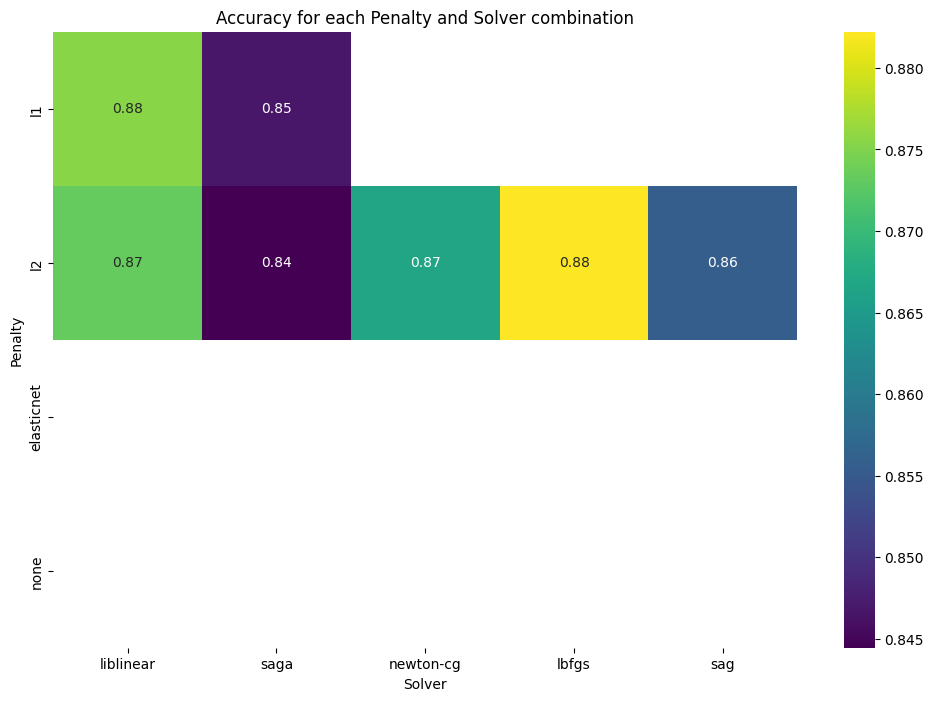

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the function to plot penalty combinations
def plot_penalty_vs_solver_accuracy(fixed_params, X_train, y_train, X_test, y_test, param_dist):
    penalties = param_dist['penalty']
    solvers = param_dist['solver']
    accuracies = np.zeros((len(penalties), len(solvers)))

    for i, penalty in enumerate(penalties):
        for j, solver in enumerate(solvers):
            params = fixed_params.copy()
            params['penalty'] = penalty
            params['solver'] = solver
            try:
                log_reg = LogisticRegression(**params, random_state=1)
                log_reg.fit(X_train, y_train)
                y_pred = log_reg.predict(X_test)
                accuracies[i, j] = accuracy_score(y_test, y_pred)
            except ValueError as e:
                print(f"Skipping penalty={penalty}, solver={solver} due to error: {e}")
                accuracies[i, j] = np.nan  # Assign NaN for invalid combinations

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(accuracies, annot=True, xticklabels=solvers, yticklabels=penalties, cmap="viridis", cbar=True)
    plt.xlabel('Solver')
    plt.ylabel('Penalty')
    plt.title('Accuracy for each Penalty and Solver combination')
    plt.show()

# Assuming you have best_result from GridSearchCV
best_result = clf.best_params_

# Define the fixed parameters based on the best results obtained from GridSearchCV
fixed_params_for_penalty = {k: v for k, v in best_result.items() if k != 'penalty' and k != 'solver'}

# Define the parameter distributions
param_dist_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'], 
    'max_iter': [100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000]  # Increasing the number of iterations
}

# Plot penalty vs solver accuracy
plot_penalty_vs_solver_accuracy(fixed_params_for_penalty, x_train, y_train, x_test, y_test, param_dist_log_reg)


# balance 


In [426]:
smote = SMOTE(random_state=123)
x_sm, y_sm = smote.fit_resample(x_train, y_train)
y_sm.value_counts()

HiringDecision
1    714
0    714
Name: count, dtype: int64

# Create instance from LogisticRegression


In [427]:
lrB_model=LogisticRegression()


# oversampled

In [428]:
param_grid = [    
    {'penalty': ['l1'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': [ 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [ 100, 200, 300,500,1000,5000, 10000, 20000]  # Increasing the number of iterations
    }
]
clf = GridSearchCV(lrB_model, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1)
best_clf = clf.fit(x_sm,y_sm)
best_model = best_clf.best_estimator_



/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohamadahmad/untitled folder/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [429]:

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [430]:
print(f"Accuracy: {accuracy*100}")



Accuracy: 83.55555555555556


In [431]:
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Recall:  0.8449612403100775
Precision:  0.6687116564417178
F1-Score:  0.7465753424657534


# undersampling

In [432]:
lrC_model=LogisticRegression()


In [433]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter# RandomUnderSampler for undersampling the majority class
rus = RandomUnderSampler(random_state=123)  # Reduces the majority class to match the minority

# Now, apply RandomUnderSampler to the data oversampled by SMOTE
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

# Print class distribution after undersampling
print("After Undersampling:", Counter(y_resampled))  # Should remain balanced as SMOTE had already balanced it



After Undersampling: Counter({0: 336, 1: 336})


In [434]:
param_grid = [    
    {    'penalty': ['l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': [ 'newton-cg'],  # Algorithm to use in the optimization problem
    'max_iter': [ 100, 200, 300,500,1000,5000, 10000, 20000]  # Increasing the number of iterations
    }
]
clf = GridSearchCV(lrC_model, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1)
best_clf = clf.fit(x_resampled,y_resampled)
best_model = best_clf.best_estimator_



In [435]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Accuracy: 81.77777777777779


In [436]:
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Recall:  0.8992248062015504
Precision:  0.6270270270270271
F1-Score:  0.7388535031847133
